# One-way ANOVA
...

## One-way ANOVA as a Linear Model
Although you may be used to thinking about an ANOVA as a table of hypothesis tests, in reality an ANOVA is a very basic linear model. In the case of a one-way ANOVA, there is only a *single* categorical predictor (hence the *one-way* name) with a certain number of levels. The ANOVA model is then

$$
y_{ij} = \mu_{j} + \epsilon_{ij},
$$

where $\mu_{j}$ is simply the *group mean* for level $j$ of the predictor. For instance, say our categorical predictor had 3 levels ($j = 1,2,3$). The $i$ th observation from the first level would be denoted $y_{i1}$, the $i$ th observation from the second level would be denoted $y_{i2}$ and the $i$ th observation from the third level would be denoted $y_{i3}$. As such, this implies that there are 3 unique model predictors, once for each level of the predictor. So, when $j = 1,2,3$, we have

$$
\begin{align*}
    y_{i1} &= \mu_{1} + \epsilon_{i1} \\
    y_{i2} &= \mu_{2} + \epsilon_{i2} \\
    y_{i3} &= \mu_{3} + \epsilon_{i3}
\end{align*}
$$

This makes the model *very simple*. Every data point has a predicted value that is equal to the mean of the group that data point belongs to. The errors then reflect the differences between the group means and the raw data.

### Two-sample $t$-test as a Special Case
Notice that there is nothing in the definition above that states how many values $j$ should take. This is important because both the one-sample and two-sample $t$-tests are *sepecial cases* of the one-way ANOVA model given above. In the one-sample case, we set $j = 1$ and in the two-sample case we set $j = 1,2$. 

To see this more clearly, we know already that the dummy variable representation we used previously for the two-sample $t$-test creates *two* equations for the *two* different categories

$$
\begin{align*}
    E\left(y_{i1}\right) &= \beta_{0} + \left(\beta_{1} \times 0\right) = \beta_{0} \\
    E\left(y_{i2}\right) &= \beta_{0} + \left(\beta_{1} \times 1\right) = \beta_{0} + \beta_{1}
\end{align*}
$$

In other words, every data point from the first category gets a predicted value of $\beta_{0}$ and every data point from the second category gets a predicted value of $\beta_{0} + \beta_{1}$. Putting this in the context of group means, we also know that $\beta_{0} = \mu_{1}$ and $\beta_{1} = \left(\mu_{2} - \mu_{1}\right)$. If we substitute these values in to the regression equations above, we get

$$
\begin{align*}
    E\left(y_{i1}\right) &= \mu_{1} \\
    E\left(y_{i2}\right) &= \mu_{1} + \left(\mu_{2} - \mu_{1}\right) = \mu_{2}
\end{align*}
$$

Putting it all together, we get

$$
\begin{align*}
    y_{i1} &= \beta_{0} + \epsilon_{i1} &= \mu_{1} + \epsilon_{i1} \\
    y_{i2} &= \beta_{0} + \beta_{1} + \epsilon_{i2} &= \mu_{2} + \epsilon_{i2}
\end{align*}
$$


As such, the dummy variable representation in the regression model simplifies to the traditional linear model specification. In other words, we can turn a regression model into a model of the group means through the use of dummy variables. This also highlights that the one-sample $t$-test, two-sample $t$-test and one-way ANOVA are all just special cases of each other. If we set $j = 1$ we have a *one-sample $t$-test* (simply a regression model containing an intercept and nothing else), if we set $j = 1,2$ we have a *two-sample $t$-test*, and if we set $j = 1,2,\dots,k$ we have a *one-way ANOVA*. Indeed, these different names are entirely unnecessary as they are all effectively *the same model*, just with different forms of dummy variables.

## Dummy Variables Coding > 2 Levels
... The short answer is that we simply *add more dummy variables*. Indeed, our general rule is that for $k$ levels of a predictor we need to add $k - 1$ dummy variables to the model. Notice that this fits with what we have already seen. For a two-sample $t$-test, $k = 2$ and we had to add $k - 1 = 2 - 1 = 1$ dummy variable to the model. If it were a one-sample $t$-test, we would have $k = 1$ and we would add $k - 1 = 1 - 1 = 0$ dummy variables to the model (because we only need an intercept). For the most basic one-way ANOVA case where $k = 3$, we therefore need to add $k - 1 = 3 - 1 = 2$ dummy variables to the model. Let us now see how this is done in `R`, before we discuss the theory in more detail.

...

This dummy variable representation then creates 3 equations for the 3 different categories

$$
\begin{align*}
    E\left(y_{i1}\right) &= \beta_{0} + \left(\beta_{1} \times 0\right) + \left(\beta_{2} \times 0\right) = \beta_{0} \\
    E\left(y_{i2}\right) &= \beta_{0} + \left(\beta_{1} \times 1\right) + \left(\beta_{2} \times 0\right) = \beta_{0} + \beta_{1} \\
    E\left(y_{i3}\right) &= \beta_{0} + \left(\beta_{1} \times 0\right) + \left(\beta_{2} \times 1\right) = \beta_{0} + \beta_{2} 
\end{align*}
$$

If we now take that $\beta_{0} = \mu_{1}$, $\beta_{1} = \left(\mu_{2} - \mu_{1}\right)$ and $\beta_{2} = \left(\mu_{3} - \mu_{1}\right)$, we can substitute these values in and we get

$$
\begin{align*}
    E\left(y_{i1}\right) &= \mu_{1} \\
    E\left(y_{i2}\right) &= \mu_{1} + \left(\mu_{2} - \mu_{1}\right) = \mu_{2} \\
    E\left(y_{i3}\right) &= \mu_{1} + \left(\mu_{3} - \mu_{1}\right) = \mu_{3}
\end{align*}
$$

To begin with, we will redefine our `origin` variable to further split the `Other` category into `Japan` and `Europe`. We also convert this into a factor straight away and check the levels.

In [1]:
data(mtcars)
mtcars$origin <- c('Japan','Japan','USA','USA','USA','USA','USA','Europe','Europe','Europe',
                   'Europe','Europe','Europe','Europe','USA','USA','USA','Europe','Japan',
                   'Japan','Japan','USA','USA','USA','USA','Europe','Europe','Europe',
                   'USA','Europe','Europe','Europe')
mtcars$origin <- as.factor(mtcars$origin)
print(levels(mtcars$origin))

[1] "Europe" "Japan"  "USA"   


The dataset now looks like this

In [2]:
print(mtcars)

                     mpg cyl  disp  hp drat    wt  qsec vs am gear carb origin
Mazda RX4           21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4  Japan
Mazda RX4 Wag       21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4  Japan
Datsun 710          22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1    USA
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1    USA
Hornet Sportabout   18.7   8 360.0 175 3.15 3.440 17.02  0  0    3    2    USA
Valiant             18.1   6 225.0 105 2.76 3.460 20.22  1  0    3    1    USA
Duster 360          14.3   8 360.0 245 3.21 3.570 15.84  0  0    3    4    USA
Merc 240D           24.4   4 146.7  62 3.69 3.190 20.00  1  0    4    2 Europe
Merc 230            22.8   4 140.8  95 3.92 3.150 22.90  1  0    4    2 Europe
Merc 280            19.2   6 167.6 123 3.92 3.440 18.30  1  0    4    4 Europe
Merc 280C           17.8   6 167.6 123 3.92 3.440 18.90  1  0    4    4 Europe
Merc 450SE          16.4   8 275.8 180 3.07 4.070 17

So let us now see how `R` has coded these catgories in terms of dummy variables

In [3]:
print(contrasts(mtcars$origin))

       Japan USA
Europe     0   0
Japan      1   0
USA        0   1


Looking at each row given above, we can summise that

$$
\begin{align*}
    \mu_{\text{Europe}} &= \beta_{0} + (\beta_{1} \times \mathbf{0}) + (\beta_{2} \times \mathbf{0}) = \beta_{0} \\
    \mu_{\text{Japan}}  &= \beta_{0} + (\beta_{1} \times \mathbf{1}) + (\beta_{2} \times \mathbf{0}) = \beta_{0} + \beta_{1} \\
    \mu_{\text{USA}}    &= \beta_{0} + (\beta_{1} \times \mathbf{0}) + (\beta_{2} \times \mathbf{1}) = \beta_{0} + \beta_{2} \\
\end{align*}
$$

In [4]:
origin.mod <- lm(mpg ~ origin, data=mtcars)
summary(origin.mod)


Call:
lm(formula = mpg ~ origin, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8071 -4.1718 -0.7885  3.3444 10.5929 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.807      1.343  16.239 4.26e-16 ***
originJapan    3.753      2.618   1.434  0.16238    
originUSA     -5.669      1.935  -2.929  0.00656 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.025 on 29 degrees of freedom
Multiple R-squared:  0.3498,	Adjusted R-squared:  0.3049 
F-statistic:   7.8 on 2 and 29 DF,  p-value: 0.001947


... We can also see that the predicted values from this model are simply the group means for each level of `origin`

In [5]:
print(data.frame("Predicted" = fitted(origin.mod),
                 "Origin"    = mtcars$origin))

                    Predicted Origin
Mazda RX4            25.56000  Japan
Mazda RX4 Wag        25.56000  Japan
Datsun 710           16.13846    USA
Hornet 4 Drive       16.13846    USA
Hornet Sportabout    16.13846    USA
Valiant              16.13846    USA
Duster 360           16.13846    USA
Merc 240D            21.80714 Europe
Merc 230             21.80714 Europe
Merc 280             21.80714 Europe
Merc 280C            21.80714 Europe
Merc 450SE           21.80714 Europe
Merc 450SL           21.80714 Europe
Merc 450SLC          21.80714 Europe
Cadillac Fleetwood   16.13846    USA
Lincoln Continental  16.13846    USA
Chrysler Imperial    16.13846    USA
Fiat 128             21.80714 Europe
Honda Civic          25.56000  Japan
Toyota Corolla       25.56000  Japan
Toyota Corona        25.56000  Japan
Dodge Challenger     16.13846    USA
AMC Javelin          16.13846    USA
Camaro Z28           16.13846    USA
Pontiac Firebird     16.13846    USA
Fiat X1-9            21.80714 Europe
P

So, $\mu_{\text{EUR}} = 21.81$, $\mu_{\text{JAP}} = 25.56$ and $\mu_{\text{USA}} = 16.14$. Which we can, of course, recover from the parameter estimates using the equalities derived above

In [6]:
beta   <- coef(origin.mod)
mu.EUR <- beta[1]                   # beta0
mu.JAP <- beta[1] + beta[2]         # beta0 + beta1
mu.USA <- beta[1] + beta[3]         # beta0 + beta2
means  <- c(mu.EUR, mu.JAP, mu.USA)

names(means) <- c("EUR","JAP","USA")
print(means)

     EUR      JAP      USA 
21.80714 25.56000 16.13846 


We can also more easily do this using the `effects` package, which is generally an approch we would advocate, especially in the presence of much more complex models.

In [13]:
library(effects)
effs <- allEffects(origin.mod, residuals=TRUE)
print(effs)

 model: mpg ~ origin

 origin effect
origin
  Europe    Japan      USA 
21.80714 25.56000 16.13846 


Which, of course, we can then plot

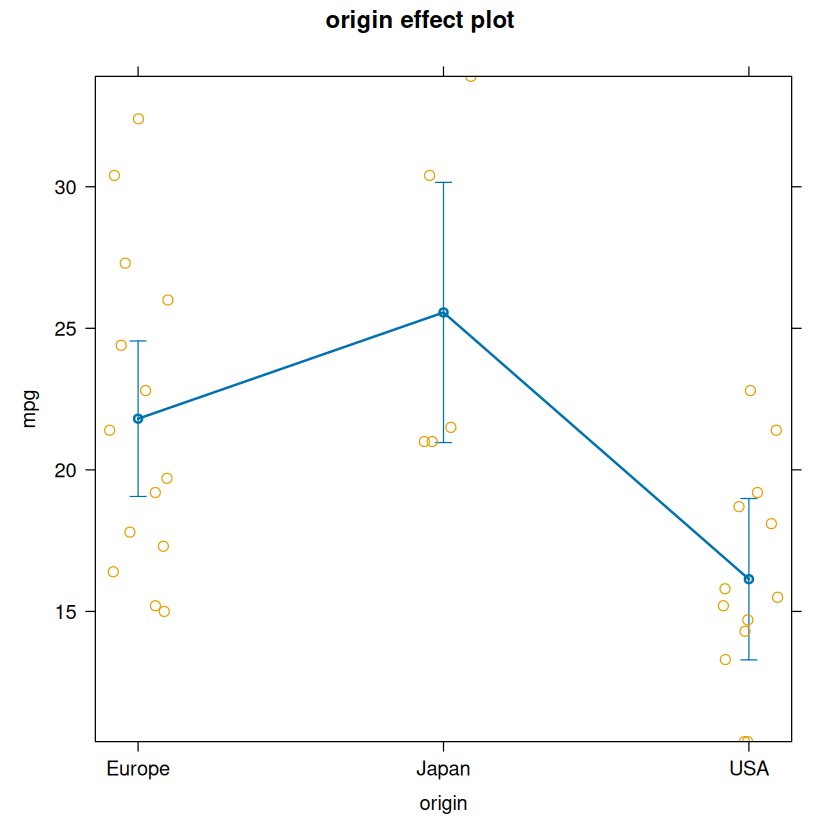

In [15]:
plot(effs, partial.residuals=list(smooth=FALSE))

This is interesting because we can see that there is quite a wide-range of MPGs within the `Europe` category, as well as an apparent dichotomisation of cars within the `Japan` category. This is likely because we have mixed together low-MPG sports cars with high-MPG non-sports cars within those groups. This suggests that an additional categorical variable denoting the *type* of car could be useful in explaining the variance in the data.  